# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

In [ ]:
# Clone the entire repo.

!git clone https://github.com/RomainReina/house-prices-prediction.git


fatal: destination path 'house-prices-prediction' already exists and is not an empty directory.


In [ ]:
df_train_path = '/content/house-prices-prediction/house-prices-advanced-regression-techniques/train.csv'
df_train = pd.read_csv(df_train_path)

df_train = df_train.drop("Id",axis=1)

print(df_train.shape) #(1460, 81)


(1460, 80)


# Prepare data

In [ ]:
# Split df_train in 2 creating df_train_train and df_train_valid, lets do 70/30

def split_df(df, train_size=0.7):
    df_train_train = df.sample(frac=train_size, random_state=42)
    df_train_valid = df.drop(df_train_train.index)
    return df_train_train, df_train_valid

df_train_train, df_train_valid = split_df(df_train)

print(df_train_train.shape) #(1022, 80)
print(df_train_valid.shape) #(438, 80)


(1022, 80)
(438, 80)


In [ ]:
# Convert the dataset into a TensorFlow dataset, output is "SalePrice"

label = "SalePrice"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train_train, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train_valid, label=label, task = tfdf.keras.Task.REGRESSION)

In [ ]:
# create our model
RF_model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
RF_model.compile()
RF_model.fit(train_ds)

Use /tmp/tmpc67kqc6d as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.947747. Found 1022 examples.
Training model...
Model trained in 0:00:02.973420
Compiling model...
Model compiled.


In [ ]:
#RF_model.summary()

In [ ]:
# lets visualize une branch of the random forest
tree_idx=50
tfdf.model_plotter.plot_model_in_colab(RF_model, tree_idx=tree_idx, max_depth=3)

# Evaluation

In [ ]:
eval = RF_model.evaluate(x=valid_ds, return_dict=True)

for name, value in eval.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 277ms/step - loss: 0.0000e+00
loss: 0.0000


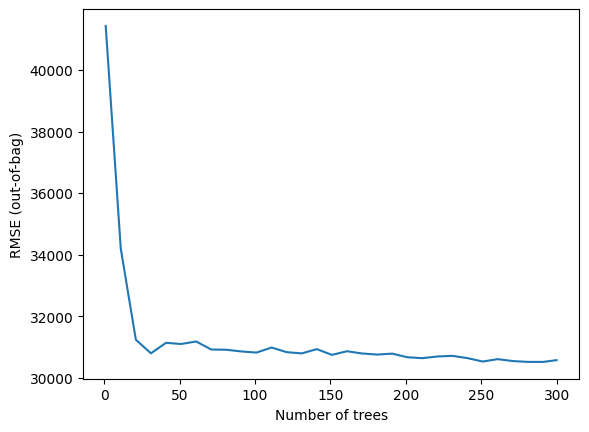

In [ ]:
import matplotlib.pyplot as plt
logs = RF_model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

# Prediction

In [ ]:
df_test_path = '/content/house-prices-prediction/house-prices-advanced-regression-techniques/test.csv'
df_test = pd.read_csv(df_test_path)
print(df_test.shape) #(1459, 80)
ids = df_test.pop('Id')
print(df_test.shape) #(1459, 79)
print(ids.shape) #(1459, 0)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, task = tfdf.keras.Task.REGRESSION)

(1459, 80)
(1459, 79)
(1459,)


In [ ]:
predictions = RF_model.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': predictions.squeeze()})
output

2/2 [==============================] - 1s 22ms/step


,Id,SalePrice
0,1461,126562.703125
1,1462,152214.906250
2,1463,180114.453125
3,1464,182705.156250
4,1465,192251.000000
...,...,...
1454,2915,85737.968750
1455,2916,87211.585938
1456,2917,155561.140625
1457,2918,118079.835938
